# Motivation
In this notebook, I want to explore the capabilities ChatGPT has in the following domains:
    <ul>
        <li>Exploratory Data Analysis</li>
        <li>Basic Machine Learning</li>
    </ul>
I'll use LangChain and its custom Agents to do most of the work for me. The Large Language Model that these Agents
will use will be GPT 3.5. 

# Imports

In [1]:
import pandas
import numpy
import os
os.environ["OPENAI_API_KEY"] 
from langchain.agents.agent_types import AgentType
from langchain_experimental.agents.agent_toolkits import create_pandas_dataframe_agent
from langchain.llms import OpenAIChat


# Tools
I'll use the create_pandas_dataframe_agent to stay consistent with our other experiments. This agent has a Python repl tool built in, which lets it run code when needed. Expanding this toolset to include a websearch tool and other fun stuff could improve perfomance, but at the moment, we only want to explore ChatGPT's capabilities as an LLM when used in an Agent.  

In [2]:
data_frame = pandas.read_csv("titanic/train.csv")
llm = OpenAIChat(temperature=0, model="gpt-3.5-turbo") # Let's set temperature to 0 to make it predictable.
agent = create_pandas_dataframe_agent(llm, data_frame, verbose=True)

/home/ahmed/.local/lib/python3.10/site-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The class `langchain_community.llms.openai.OpenAIChat` was deprecated in langchain-community 0.0.1 and will be removed in 0.2.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import ChatOpenAI`.
  warn_deprecated(
/home/ahmed/.local/lib/python3.10/site-packages/langchain_community/llms/openai.py:1070: UserWarning: You are trying to use a chat model. This way of initializing it is no longer supported. Instead, please use: `from langchain_community.chat_models import ChatOpenAI`
  warnings.warn(


# Section 1: Exploratory Data Analysis
In this section, I am going to explore ChatGPT's capabilities as an LLM to orient my Agent for EDA. I am going to have the agent do the following:
<ul>
    <li>Find NaN values</li>
    <li>Fill NaN values with the mode</li>
    <li>Various plots</li>
</ul>

In [3]:
# First, let's get some reference for the questions we are about to ask.
print("NaN values are: ", data_frame.isna().sum().sum())
data_frame.head()

NaN values are:  866


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
agent.invoke("How many NaN values are there?")



> Entering new AgentExecutor chain...
Thought: I can count the number of NaN values in the dataframe.
Action: python_repl_ast
Action Input: df.isnull().sum().sum()866I have counted a total of 866 NaN values in the dataframe.
Final Answer: There are 866 NaN values in the dataframe.

> Finished chain.


{'input': 'How many NaN values are there?',
 'output': 'There are 866 NaN values in the dataframe.'}

In [4]:
agent.invoke("Fill all the NaN values with the mode.")



> Entering new AgentExecutor chain...
Thought: We need to fill all the NaN values in the dataframe with the mode of each column.
Action: Use the `fillna` method with the mode of each column.
Action Input: `df.fillna(df.mode().iloc[0], inplace=True)`Use the `fillna` method with the mode of each column. is not a valid tool, try one of [python_repl_ast].I should use the python_repl_ast tool to execute the command.
Action: python_repl_ast
Action Input: df.fillna(df.mode().iloc[0], inplace=True)I now know the final answer
Final Answer: df.fillna(df.mode().iloc[0], inplace=True)

> Finished chain.


{'input': 'Fill all the NaN values with the mode.',
 'output': 'df.fillna(df.mode().iloc[0], inplace=True)'}

In [5]:
# Let's verify if the agent did so successfully.
total_nan_vals = data_frame.isna().sum().sum()
print(total_nan_vals)
data_frame.head()

0


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S




> Entering new AgentExecutor chain...
Thought: To make a plot of the age distribution, we can use the `matplotlib` library.
Action: python_repl_ast
Action Input: import matplotlib.pyplot as pltNow that we have imported `matplotlib.pyplot` as `plt`, we can proceed to create the plot.
Action: python_repl_ast
Action Input: plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')(array([ 40.,  14.,  15.,  31.,  79., 275.,  85.,  84.,  73.,  45.,  35.,
        35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]), array([ 0.42 ,  4.399,  8.378, 12.357, 16.336, 20.315, 24.294, 28.273,
       32.252, 36.231, 40.21 , 44.189, 48.168, 52.147, 56.126, 60.105,
       64.084, 68.063, 72.042, 76.021, 80.   ]), <BarContainer object of 20 artists>)I now know the final answer
Final Answer: The plot of the age distribution has been created using the `plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')` command.

> Finished chain.


{'input': 'Make a plot of the age distribution.',
 'output': "The plot of the age distribution has been created using the `plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')` command."}

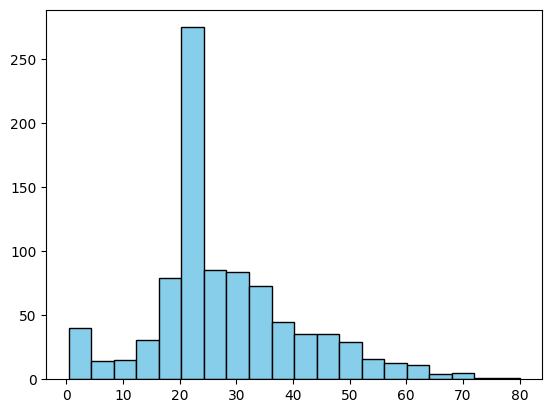

In [15]:
# Next, let's have it make some plots.
agent.invoke("Make a plot of the age distribution.")



> Entering new AgentExecutor chain...
Thought: To make a plot of gender against survival, we need to first group the data by gender and then calculate the survival rate for each gender.
Action: python_repl_ast
Action Input: df.groupby('Sex')['Survived'].mean()Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64Now that we have the survival rate for each gender, we can create a plot.
Action: python_repl_ast
Action Input: df.groupby('Sex')['Survived'].mean().plot(kind='bar')Axes(0.125,0.11;0.775x0.77)I now know the final answer
Final Answer: A bar plot showing the survival rate for each gender.

> Finished chain.


{'input': 'Make a plot gender against survival.',
 'output': 'A bar plot showing the survival rate for each gender.'}

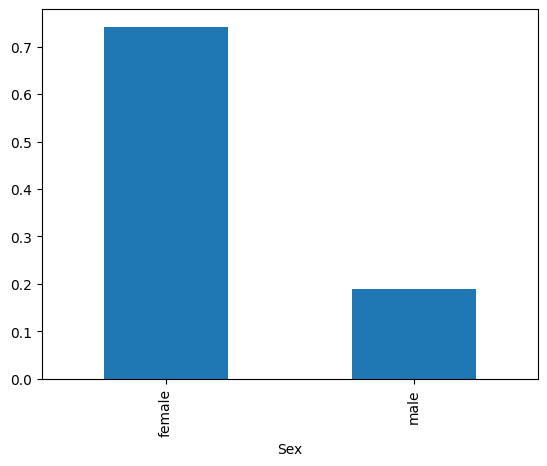

In [16]:
agent.invoke("Make a plot gender against survival.")



> Entering new AgentExecutor chain...
Thought: To create a heatmap, we can use the seaborn library which works well with pandas dataframes.

Action: python_repl_ast
Action Input: import seaborn as snsNow that we have imported seaborn, we can create a heatmap using the `sns.heatmap()` function.

Action: python_repl_ast
Action Input: sns.heatmap(df.corr(), annot=True)ValueError: could not convert string to float: 'S'The error indicates that there is a string value in the dataframe that cannot be converted to a float for correlation calculation. We need to handle this by encoding the categorical variables before creating the heatmap.

Action: python_repl_ast
Action Input: df_encoded = pd.get_dummies(df, columns=['Sex', 'Embarked'])NameError: name 'pd' is not definedWe need to import the pandas library to use the `pd.get_dummies()` function.

Action: python_repl_ast
Action Input: import pandas as pdNow that we have imported pandas, let's encode the categorical variables and create the he

{'input': 'Make a heatmap of all variables against survival',
 'output': 'The heatmap of all variables against survival has been created successfully.'}

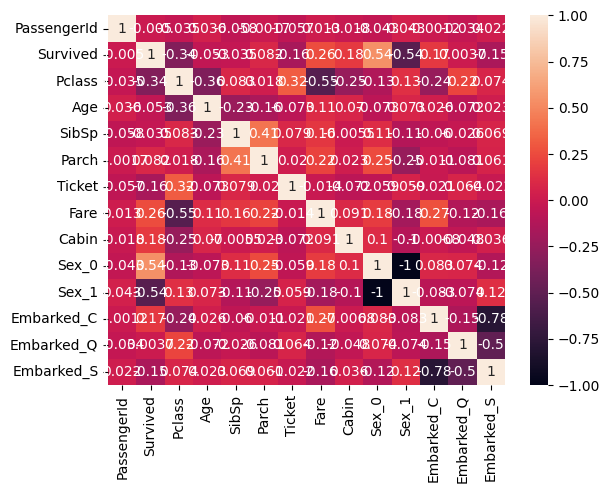

In [20]:
# Here, we notice that it struggles to convert the categorical variables into numbers, and attempts to do so
# naively. However, after a few shots (4), it is able to do so.
agent.invoke("Make a heatmap of all variables against survival")

# Post Experiment Observations
While the Agent successfully answered the questions and performed the necessary operations, it has trouble with
complex tasks such as plotting a heatmap against all variables. Here's a breakdown of my observations:
<ul>
    <li>The Agent struggles with complex prompts that require it to do more than one thing at a time. However, it is able to complete these tasks when prompted repeatedly or when the prompt is broken down.</li>
    <li>Sometimes, the LLM does not correctly call the Python Repl, though I imagine this can be fixed via system prompting and defining the format more clearly.</li>
    <li>The Agent performs best when the prompts are asked via questions, and not statements. This is due to the Agent being optimized for question-answering.</li>
</ul>

# Section 2: Basic Inference
In this section, I'll have the Agent make some basic machine learning models for some inference regarding the data frame we have fed it. First, let's have it clean the data.

In [45]:
data_frame.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


In [6]:
agent.invoke("Please drop the following columns inplace from the original dataframe: Name, Ticket, Cabin, PassengerId.")



> Entering new AgentExecutor chain...
Thought: To drop columns from a pandas dataframe, I can use the `drop` method with the `axis=1` parameter to specify columns and `inplace=True` to modify the original dataframe.
Action: python_repl_ast
Action Input: df.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1, inplace=True)I should check the modified dataframe to see if the columns have been dropped successfully.
Action: python_repl_ast
Action Input: print(df.head())   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S
The columns Name, Ticket, Cabin, and PassengerId have been successfully dropped from the original dataframe.
Final Answer: The co

{'input': 'Please drop the following columns inplace from the original dataframe: Name, Ticket, Cabin, PassengerId.',
 'output': 'The columns Name, Ticket, Cabin, and PassengerId have been dropped from the original dataframe.'}

In [7]:
# verify change
data_frame.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [8]:
agent.invoke("Please map the strings in the following columns of the original dataframe itself to integers: sex, embarked")



> Entering new AgentExecutor chain...
Thought: We can use the `map()` function in pandas to map strings to integers in specific columns of the dataframe.

Action: python_repl_ast
Action Input: df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})We have successfully mapped the 'Sex' column to integers. Now let's do the same for the 'Embarked' column.

Action: python_repl_ast
Action Input: df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})We have successfully mapped the 'Embarked' column to integers as well.

Final Answer: The strings in the 'Sex' column have been mapped to integers where 'male' is represented as 0 and 'female' as 1. Similarly, the strings in the 'Embarked' column have been mapped to integers where 'S' is represented as 0, 'C' as 1, and 'Q' as 2 in the original dataframe.

> Finished chain.


{'input': 'Please map the strings in the following columns of the original dataframe itself to integers: sex, embarked',
 'output': "The strings in the 'Sex' column have been mapped to integers where 'male' is represented as 0 and 'female' as 1. Similarly, the strings in the 'Embarked' column have been mapped to integers where 'S' is represented as 0, 'C' as 1, and 'Q' as 2 in the original dataframe."}

In [9]:
# Let's verify again.
data_frame.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


# Linear Regression to predict the Fare

In [55]:
agent.invoke("""Now I want you to follow all these steps in order:\n
1. Split the dataframe into X and y. Where y is Fare column.
2. Split X and y into train, test sets.
3. Fit a linear regression model to the train set.
4. Predict on test set.
5. Print the loss on the predictions.

Run all steps from 1 to 5.

You can use the python_repl_ast tool to run code.
""")



> Entering new AgentExecutor chain...
Thought: To split the dataframe into X and y, I need to select the columns for X and y.
Action: python_repl_ast
Action Input: X = df.drop('Fare', axis=1)Now I have X which contains all columns except 'Fare'. Next, I need to extract y which is the 'Fare' column.
Action: python_repl_ast
Action Input: y = df['Fare']I have successfully split the dataframe into X and y. Next, I need to split X and y into train and test sets.
Action: python_repl_ast
Action Input: from sklearn.model_selection import train_test_splitI imported the necessary library for splitting the data. Now, I need to split X and y into train and test sets.
Action: python_repl_ast
Action Input: X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)I have successfully split X and y into train and test sets. Next, I need to fit a linear regression model to the train set.
Action: python_repl_ast
Action Input: from sklearn.linear_model import LinearRegres

{'input': 'Now I want you to follow all these steps in order:\n\n1. Split the dataframe into X and y. Where y is Fare column.\n2. Split X and y into train, test sets.\n3. Fit a linear regression model to the train set.\n4. Predict on test set.\n5. Print the loss on the predictions.\n\nRun all steps from 1 to 5.\n\nYou can use the python_repl_ast tool to run code.\n',
 'output': 'The loss on the predictions is 935.5934506819448'}

# SVR to predict the Fare

In [56]:
agent.invoke("""Now I want you to follow all these steps in order:\n
1. Split the dataframe into X and y. Where y is Fare column.
2. Split X and y into train, test sets.
3. Fit a SVR model to the train set.
4. Predict on test set.
5. print the MSE loss on the predictions.

Run all steps from 1 to 5.

You can use the python_repl_ast tool to run code.
""")



> Entering new AgentExecutor chain...
Thought: I need to follow the steps provided to split the dataframe, train the SVR model, make predictions, and calculate the MSE loss.
Action: Split the dataframe into X and y.
Action Input: X = df.drop('Fare', axis=1)
y = df['Fare']Split the dataframe into X and y. is not a valid tool, try one of [python_repl_ast].I should use the python_repl_ast tool to split the dataframe into X and y.
Action: python_repl_ast
Action Input: X = df.drop('Fare', axis=1)
y = df['Fare']I have successfully split the dataframe into X and y.
Action: Split X and y into train, test sets.
Action Input: from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)Split X and y into train, test sets. is not a valid tool, try one of [python_repl_ast].I should use the python_repl_ast tool to split X and y into train and test sets.
Action: python_repl_ast
Action Input: from sklearn.model_selecti

{'input': 'Now I want you to follow all these steps in order:\n\n1. Split the dataframe into X and y. Where y is Fare column.\n2. Split X and y into train, test sets.\n3. Fit a SVR model to the train set.\n4. Predict on test set.\n5. print the MSE loss on the predictions.\n\nRun all steps from 1 to 5.\n\nYou can use the python_repl_ast tool to run code.\n',
 'output': 'The MSE loss on the predictions is 1713.3896680152393.'}

# Logistic Regression to classify Survival

In [10]:
agent.invoke("""Now I want you to follow all these steps in order:\n
1. Split the dataframe into X and y. Where y is Survived column.
2. Split X and y into train, test sets.
3. Fit a Logistic Regression model to the train set.
4. Predict on test set.
5. print the accuracy of the predictions. Round to 4 decimal places and print it out neatly.

Run all steps from 1 to 5.

You can use the python_repl_ast tool to run code.
""")



> Entering new AgentExecutor chain...
Thought: We need to follow the steps provided to split the dataframe, train a Logistic Regression model, make predictions, and calculate accuracy.
Action: Split the dataframe into X and y.
Action Input: X = df.drop('Survived', axis=1), y = df['Survived']Split the dataframe into X and y. is not a valid tool, try one of [python_repl_ast].I should use the python_repl_ast tool to split the dataframe into X and y.
Action: python_repl_ast
Action Input: X = df.drop('Survived', axis=1), y = df['Survived']SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (<unknown>, line 1)I need to correct the syntax error in my input.
Action: python_repl_ast
Action Input: X = df.drop('Survived', axis=1), y = df['Survived']SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (<unknown>, line 1)I need to use the correct syntax for assigning values to X and y.
Action: python_repl_ast
Action Input: X = df.drop('Survived', axis=1)

/home/ahmed/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


I have successfully fit a Logistic Regression model to the train set.
Action: Predict on test set.
Action Input: y_pred = model.predict(X_test)Predict on test set. is not a valid tool, try one of [python_repl_ast].I should use the python_repl_ast tool to predict on the test set.
Action: python_repl_ast
Action Input: y_pred = model.predict(X_test)I have successfully predicted on the test set.
Action: Print the accuracy of the predictions.
Action Input: from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")Print the accuracy of the predictions. is not a valid tool, try one of [python_repl_ast].I should use the python_repl_ast tool to print the accuracy of the predictions.
Action: python_repl_ast
Action Input: from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")Accuracy: 0.7989
I have successfully completed all the steps and the accuracy of the predictions is

{'input': 'Now I want you to follow all these steps in order:\n\n1. Split the dataframe into X and y. Where y is Survived column.\n2. Split X and y into train, test sets.\n3. Fit a Logistic Regression model to the train set.\n4. Predict on test set.\n5. print the accuracy of the predictions. Round to 4 decimal places and print it out neatly.\n\nRun all steps from 1 to 5.\n\nYou can use the python_repl_ast tool to run code.\n',
 'output': 'The accuracy of the predictions is 0.7989.'}

# SVM to classify Survival

In [11]:
agent.invoke("""Now I want you to follow all these steps in order:\n
1. Split the dataframe into X and y. Where y is Survived column.
2. Split X and y into train, test sets.
3. Fit a Gaussian SVM with Poly kernel to the train set.
4. Predict on test set.
5. print the accuracy of the predictions. Round to 4 decimal places and print it out neatly.

Run all steps from 1 to 5.

You can use the python_repl_ast tool to run code.
""")



> Entering new AgentExecutor chain...
Question: Split the dataframe into X and y. Where y is Survived column.
Thought: We need to separate the features (X) from the target variable (y).
Action: python_repl_ast
Action Input: X = df.drop('Survived', axis=1)Now that we have separated the features into X, let's extract the target variable y.
Action: python_repl_ast
Action Input: y = df['Survived']Now that we have X and y, we can move on to splitting them into train and test sets.
Question: Split X and y into train, test sets.
Action: python_repl_ast
Action Input: from sklearn.model_selection import train_test_splitNow we can use the train_test_split function to split X and y into train and test sets.
Action: python_repl_ast
Action Input: X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)Now that we have our train and test sets, we can fit a Gaussian SVM with Poly kernel to the train set.
Action: python_repl_ast
Action Input: from sklearn.svm import 

{'input': 'Now I want you to follow all these steps in order:\n\n1. Split the dataframe into X and y. Where y is Survived column.\n2. Split X and y into train, test sets.\n3. Fit a Gaussian SVM with Poly kernel to the train set.\n4. Predict on test set.\n5. print the accuracy of the predictions. Round to 4 decimal places and print it out neatly.\n\nRun all steps from 1 to 5.\n\nYou can use the python_repl_ast tool to run code.\n',
 'output': 'The accuracy of the predictions is 0.7877.'}

# Naive Bayes to classify Survival

In [9]:
agent.invoke("""Now I want you to follow all these steps in order:\n
1. Split the dataframe into X and y. Where y is Survived column.
2. Split X and y into train, test sets.
3. Fit a Naive Bayes model to the train set.
4. Predict on test set.
5. print the accuracy of the predictions. Round to 4 decimal places and print it out neatly.

Run all steps from 1 to 5.

You can use the python_repl_ast tool to run code.
""")



> Entering new AgentExecutor chain...
Question: Split the dataframe into X and y. Where y is Survived column.
Thought: We need to separate the features (X) from the target variable (y).
Action: python_repl_ast
Action Input: X = df.drop('Survived', axis=1)We have successfully separated the features into X by dropping the 'Survived' column.
Question: Now let's assign the 'Survived' column to y.
Action: python_repl_ast
Action Input: y = df['Survived']We have successfully assigned the 'Survived' column to y. Now we can move on to the next step.

Question: Split X and y into train, test sets.
Thought: We need to split our data into training and testing sets to evaluate the model.
Action: python_repl_ast
Action Input: from sklearn.model_selection import train_test_splitWe have imported the necessary library for splitting the data into train and test sets.

Action: python_repl_ast
Action Input: X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)We have 

{'input': 'Now I want you to follow all these steps in order:\n\n1. Split the dataframe into X and y. Where y is Survived column.\n2. Split X and y into train, test sets.\n3. Fit a Naive Bayes model to the train set.\n4. Predict on test set.\n5. print the accuracy of the predictions. Round to 4 decimal places and print it out neatly.\n\nRun all steps from 1 to 5.\n\nYou can use the python_repl_ast tool to run code.\n',
 'output': 'The accuracy of the predictions is 0.7821.'}

# KNN to classify Survival

In [10]:
agent.invoke("""Now I want you to follow all these steps in order:\n
1. Split the dataframe into X and y. Where y is Survived column.
2. Split X and y into train and test sets.
3. Fit a KNN model to the train set.
4. Find the best n_neighbors parameter out of range (1,10). Import some grid search method to do this.
5. Predict with best model on test set.
6. print the accuracy of the predictions. Round to 4 decimal places and print it out neatly.

Run all steps from 1 to 6.

You can use the python_repl_ast tool to run code.
""")



> Entering new AgentExecutor chain...
Thought: We need to follow the steps provided to split the dataframe, train a KNN model, find the best n_neighbors parameter, make predictions, and calculate accuracy.
Action: Split the dataframe into X and y.
Action Input: X = df.drop('Survived', axis=1)
y = df['Survived']Split the dataframe into X and y. is not a valid tool, try one of [python_repl_ast].I should use the python_repl_ast tool to split the dataframe into X and y.
Action: python_repl_ast
Action Input: X = df.drop('Survived', axis=1)
y = df['Survived']Now that I have split the dataframe into X and y, I can proceed with the next steps. Let's continue with splitting X and y into train and test sets.
Action: python_repl_ast
Action Input: from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)Now that I have split X and y into train and test sets, I can fit a KNN model to the train set.
Action: python

{'input': 'Now I want you to follow all these steps in order:\n\n1. Split the dataframe into X and y. Where y is Survived column.\n2. Split X and y into train and test sets.\n3. Fit a KNN model to the train set.\n4. Find the best n_neighbors parameter out of range (1,10). Import some grid search method to do this.\n5. Predict with best model on test set.\n6. print the accuracy of the predictions. Round to 4 decimal places and print it out neatly.\n\nRun all steps from 1 to 6.\n\nYou can use the python_repl_ast tool to run code.\n',
 'output': 'Accuracy: 0.7263'}

# Post Experiment Observations
After the experiments in Section 2, we notice the following:
<ul>
<li>The model performs better if the prompt explicitly tells it which tools to use in what scenario. This makes me think that perhaps making a custom agent would be a better idea as we are able to set the tool descriptions ourselves that way.</li>
<li>The Agent is fairly capable in producing classical machine learning algorithms.</li>
<li>The Agent struggles with composite prompts, whereby the flow of the requirements is not explained and the Agent must use the underlying LLM to deduce the steps itself.</li>
<li>The user must still be quite involved, and atleast familiar with the high level requirements of what it wants the Agent to do. We would like to reduce this hand-holding as a next step.</li>
<li>Finally, it would be interesting to see how the LLM performs on a custom defined Prompt and Agent, which gives us more control. We suspect it shall perform better.</li>
</ul>